In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.stats as stat
# import statsmodels.stats.proportion as proportion

In [2]:
def model_comp_pvals(N, frequencies):
    pNull=np.sum(frequencies)/(np.sum(N))
    pFull=frequencies/N
    LikelyNull = np.prod(stat.binom.pmf(frequencies,N,pNull))
    LikelyFull = np.prod(stat.binom.pmf(frequencies,N,pFull))

    chi_sq = -2 * np.log(LikelyNull/LikelyFull)
#     print(chi_sq)
    return chi_sq, 1-stat.chi2.cdf(chi_sq, 3, )   #% goodness of fit for Full vs Null (whehter there are differences between conditions)

#     pEffect=[.75 .75 .75 .25];  #% power to detect three dual state and one single state (87% power with N=15)


In [3]:
single_fits = pd.read_csv('model_results/single_fit_avgsmootherror_learn_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
dual_fits = pd.read_csv('model_results/dual_fit_avgsmootherror_learn_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)


In [4]:
pid = 661
dual_fits.loc[dual_fits['p_id'] == pid] 
# single_fits.loc[single_fits['p_id'] == pid]


,p_id,gof,As,Bs,Af,Bf,Eps
20,661,-1.231159,0.996265,0.014792,0.241782,0.070868,0.070644


In [5]:
single_fits['AIC'] = 2*single_fits['gof']*448 + 2*2
dual_fits['AIC'] = 2*dual_fits['gof']*448 + 2*4

single_fits['BIC'] = 2*single_fits['gof']*448 + np.log(64*7)*2
dual_fits['BIC'] = 2*dual_fits['gof']*448 + np.log(64*7)*4


# single_fits['AIC'] = 2*single_fits['gof'] + 2*2
# dual_fits['AIC'] = 2*dual_fits['gof'] + 2*4

# single_fits['BIC'] = 2*single_fits['gof'] + np.log(64*7)*2
# dual_fits['BIC'] = 2*dual_fits['gof'] + np.log(64*7)*4

In [6]:
single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [7]:
dual_fits

,p_id,gof,As,Bs,Af,Bf,Eps,AIC,BIC,Rotation,Emphasis
0,641,-1.299804,0.998289,0.014784,8.969843e-01,0.054205,0.065958,-1156.624331,-1140.205158,Gradual,Accuracy
1,642,-0.847004,1.000000,0.000820,2.108940e-01,0.325475,0.103735,-750.915598,-734.496425,Sudden,Speed
2,643,0.288959,1.000000,0.000161,1.000000e+00,0.003051,0.323007,266.907017,283.326190,Gradual,Speed
3,644,-1.133671,0.996847,0.007339,7.270928e-01,0.172001,0.077878,-1007.769546,-991.350373,Sudden,Accuracy
4,645,-0.808461,0.996738,0.011608,4.780760e-07,0.131386,0.107809,-716.381446,-699.962273,Gradual,Accuracy
...,...,...,...,...,...,...,...,...,...,...,...
57,698,-0.744539,1.000000,0.003947,2.389406e-01,0.314667,0.114925,-659.106817,-642.687644,Sudden,Speed
58,699,-0.730221,0.991722,0.014461,1.030265e-04,0.014461,0.116580,-646.278291,-629.859118,Gradual,Speed
59,700,-1.281840,0.998296,0.008740,2.280266e-01,0.424543,0.067153,-1140.528466,-1124.109293,Sudden,Accuracy
60,701,-1.055656,1.000000,0.000315,9.997007e-01,0.009157,0.084160,-937.867455,-921.448282,Gradual,Accuracy


In [157]:
single_fits[single_fits['p_id'] == 653]

,p_id,gof,A,B,Eps,AIC,BIC,Rotation,Emphasis,Condition
12,653,-0.503933,0.991641,0.023525,0.146176,-447.523789,-439.314202,Gradual,Accuracy,Gradual Accuracy


In [159]:
dual_fits[dual_fits['p_id'] == 653]

,p_id,gof,As,Bs,Af,Bf,Eps,AIC,BIC,Rotation,Emphasis
12,653,-0.900709,0.997216,0.009364,0.983148,0.01349,0.098311,-799.035511,-782.616339,Gradual,Accuracy


In [160]:
sum(dual_fits['Bs'] > dual_fits['Bf'])

0

In [161]:
single_fits['Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [162]:
single_fits.loc[single_fits['AIC'] > dual_fits['AIC'], 'Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [163]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([8, 16, 10, 14]))

(17.61172583860489, 0.0005288597222199432)

In [164]:
single_fits.loc[single_fits['BIC'] > dual_fits['BIC'], 'Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [165]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([16, 7, 10, 12]))

(16.798233580514545, 0.0007775787274861834)

In [166]:
single_fits.loc[(single_fits['gof'].values < dual_fits['gof'].values), 'Condition'].value_counts()


Series([], Name: Condition, dtype: int64)

(array([5., 9., 7., 7., 8., 7., 6., 7., 4., 2.]),
 array([0.02436994, 0.09872343, 0.17307692, 0.24743041, 0.3217839 ,
        0.39613739, 0.47049088, 0.54484437, 0.61919786, 0.69355135,
        0.76790484]),
 <BarContainer object of 10 artists>)

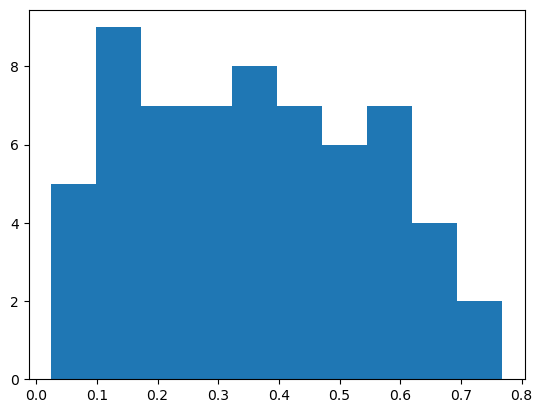

In [167]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

In [168]:
# single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)*640
single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)*448

In [169]:
single_fits['chi2'] = stat.chi2.sf(single_fits['LR_ratio'], 2)

In [170]:
single_fits.loc[single_fits['chi2'] < 0.05, 'Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [136]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([16, 14, 12, 2]))

(35.85364079334426, 8.041371701850153e-08)

# Cross Validation Comparisons

In [171]:
single_fits = pd.read_csv('model_results/single_fit_avgsmootherror_learn_results_cv.csv')
dual_fits = pd.read_csv('model_results/dual_fit_avgsmootherror_learn_results_cv.csv')

single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [172]:
dual_fits['dual win'] = (single_fits['test gof'].values >= dual_fits['test gof'].values).astype(int)

In [173]:
def compute_wins(dual_fits):
    # Drop column: 'Unnamed: 0'
    # dual_fits = dual_fits.drop(columns=['Unnamed: 0'])
    # Performed 1 aggregation grouped on columns: 'p_id', 'Rotation' and 2 other columns
    dual_fits = dual_fits.groupby(['p_id', 'Rotation', 'Emphasis', 'dual win']).agg(dualwin_count=('dual win', 'count')).reset_index()
    # Filter rows based on column: 'dual win'
    dual_fits = dual_fits[dual_fits['dual win'] == 1]
    return dual_fits

dual_fits_wins = compute_wins(dual_fits.copy())
dual_fits_wins['Condition'] = dual_fits_wins['Rotation'] + ' ' + dual_fits_wins['Emphasis']

In [174]:
dual_fits_wins.loc[dual_fits_wins['dualwin_count'] > 58, 'Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [95]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([15, 16, 15, 12]))

(7.169513848495249, 0.06668662927877589)

(array([ 205., 2620., 1758., 1061.,  370.,   84.,   52.,   31.,   16.,
           3.]),
 array([-0.05622616, -0.01540979,  0.02540658,  0.06622296,  0.10703933,
         0.1478557 ,  0.18867208,  0.22948845,  0.27030482,  0.3111212 ,
         0.35193757]),
 <BarContainer object of 10 artists>)

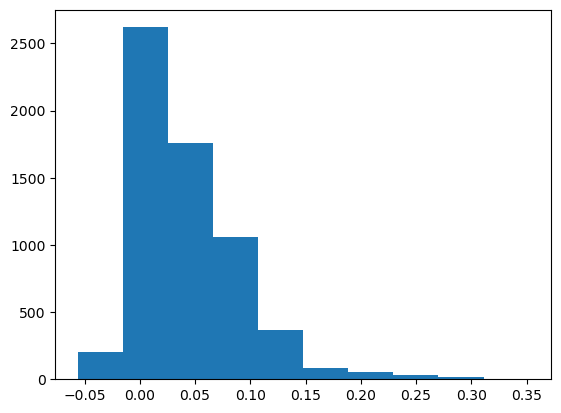

In [26]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

2/15

# Assessing Model fits visually

In [8]:
# from model_fit_functions import *
df = pd.read_csv('df_allphases.csv')
df = df.loc[df['block'] >= 1].reset_index().drop('index', axis = 1)
# df

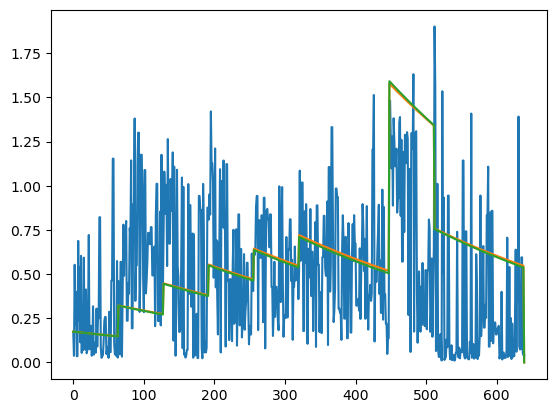

In [17]:
from model_fit_functions import *
pid = 647
ptype = df.loc[df['p_id'] == pid, 'Rotation'].unique()

A = single_fits.loc[single_fits['p_id'] == pid, 'A'].values[0]
B = single_fits.loc[single_fits['p_id'] == pid, 'B'].values[0]
As = dual_fits.loc[dual_fits['p_id'] == pid, 'As'].values[0]
Bs = dual_fits.loc[dual_fits['p_id'] == pid, 'Bs'].values[0]
Af = dual_fits.loc[dual_fits['p_id'] == pid, 'Af'].values[0]
Bf = dual_fits.loc[dual_fits['p_id'] == pid, 'Bf'].values[0]
data = df.loc[df['p_id'] == pid, 'avg errors'].values

plt.plot(data)
plt.plot(single_state_model(A, B, len(data), ptype))
plt.plot(dual_state_model(As, Bs, Af, Bf, len(data), ptype))


In [18]:
single_fits[single_fits.p_id == pid], dual_fits[dual_fits.p_id == pid]

(   p_id       gof    A         B       Eps        AIC        BIC Rotation  \
 6   647 -0.077413  1.0  0.002583  0.223958 -65.362057 -57.152471  Gradual   
 
   Emphasis      Condition  
 6    Speed  Gradual Speed  ,
    p_id       gof   As        Bs   Af        Bf       Eps         AIC  \
 6   647 -0.145229  1.0  0.001182  1.0  0.001508  0.209253 -122.125563   
 
          BIC Rotation Emphasis  
 6 -105.70639  Gradual    Speed  )

In [ ]:
np.pi/3

1.0471975511965976

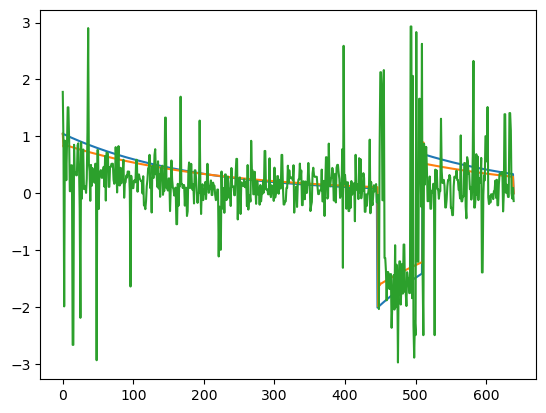

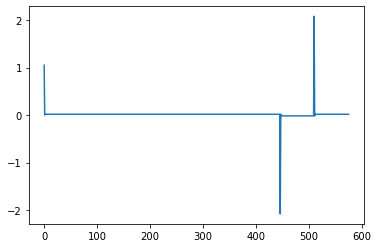

In [262]:
plt.plot(single_state_model(A, B, len(data), 'Sudden'))
